<a href="https://colab.research.google.com/github/JustynaD00/Main/blob/main/My_Rasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rasa is Opensource Machine Learning framework used for developing AI based chatbot.**

The following notebook creates a Hotel Chatbot.
Worked example - Dr Kulvinder Panesar 07/12/23


In [6]:
# Install the latest version of Rasa
!pip install rasa==3.4.5

  Using cached prompt_toolkit-3.0.28-py3-none-any.whl (380 kB)
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 3.0.43
    Uninstalling prompt-toolkit-3.0.43:
      Successfully uninstalled prompt-toolkit-3.0.43
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 8.18.1 requires prompt-toolkit<3.1.0,>=3.0.41, but you have prompt-toolkit 3.0.28 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.50 which is incompatible.


After, installing ipython you saw a "RESTART RUNTIME" button in "ipython" cell output.

Click on it to restart the runtime and you are good to go.

No need to update anything else, all run as usual.


In [7]:
!pip install -U ipython

  Using cached prompt_toolkit-3.0.43-py3-none-any.whl (386 kB)
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 3.0.28
    Uninstalling prompt-toolkit-3.0.28:
      Successfully uninstalled prompt-toolkit-3.0.28
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.50 which is incompatible.
rasa 3.4.5 requires prompt-toolkit<3.0.29,>=3.0, but you have prompt-toolkit 3.0.43 which is incompatible.
rasa-sdk 3.4.1 requires prompt-toolkit<3.0.29,>=3.0, but you have prompt-toolkit 3.0.43 which is incompatible.


In [8]:
!pip install websockets==10.0
!pip install websocket-client

**Click on above "RESTART RUNTIME" button**

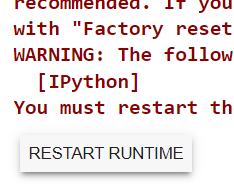

In [9]:
# Download spacy for the NLP pipeline tasks.
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
# This is  used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.
import spacy
nlp = spacy.load("en_core_web_sm")

In [11]:
# Running asynchronous Rasa code in Jupyter Notebooks requires an extra requirement, since Jupyter Notebooks already run on event loops.
# Install this requirement in the command line before launching jupyter:

!pip install nest_asyncio==1.3.3

  Attempting uninstall: nest_asyncio
    Found existing installation: nest-asyncio 1.5.8
    Uninstalling nest-asyncio-1.5.8:
      Successfully uninstalled nest-asyncio-1.5.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclassic 1.0.0 requires nest-asyncio>=1.5, but you have nest-asyncio 1.3.3 which is incompatible.
notebook 6.5.5 requires nest-asyncio>=1.5, but you have nest-asyncio 1.3.3 which is incompatible.


In [12]:
import os
import rasa
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [13]:
# Prepare for creating a project space for the Hotel Chatbot
from rasa.cli.scaffold import create_initial_project

In [14]:
# Assign a name to the project
project = "cruise-chatbot"
create_initial_project(project)

In [15]:
# move into project directory and show files
os.chdir(project)
print(os.listdir("."))

['actions', 'domain.yml', 'data', 'endpoints.yml', 'config.yml', 'tests', 'credentials.yml']


In [16]:
# To train the model,by passing in the paths to the rasa.train function.
# Note that the training files are passed as a list.
# When training has finished, rasa.train returns the path where the trained model has been saved.

config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


### Sometime it may not run on first go. So, try to execute below line 3 time and it work fine. It is bug in rasa.

In [17]:
# Train a ML model

model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

/usr/local/lib/python3.10/dist-packages/rasa/engine/caching.py:152: MovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base: DeclarativeMeta = declarative_base()
<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


(0lqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqk(B
(0x(B Rasa Open Source reports anonymous usage telemetry to help improve the product (0x(B
(0x(B for all its users.                                                             (0x(B
(0x(B                                                                                (0x(B
(0x(B If you'd like to opt-out, you can use `rasa telemetry disable`.                (0x(B
(0x(B To learn more, check out https://rasa.com/docs/rasa/telemetry/telemetry.       (0x(B
(0mqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqj(B


<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


The configuration for pipeline and policies was chosen automatically. It was written into the config file at 'config.yml'.


/usr/local/lib/python3.10/dist-packages/rasa/utils/tensorflow/model_data.py:774: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.concatenate(np.array(f)),
Processed trackers: 100%|██████████| 3/3 [00:00<00:00, 101.59it/s, # action=12]
Processed actions: 12it [00:00, 662.75it/s, # examples=12]
Processed trackers: 100%|██████████| 2/2 [00:00<00:00, 101.05it/s, # action=5]
Processed actions: 5it [00:00, 1012.38it/s, # examples=4]
Processed trackers: 100%|██████████| 120/120 [00:00<00:00, 708.20it/s, # action=30]
/usr/local/lib/python3.10/dist-packages/rasa/utils/tensorflow/model_data_utils.py:388: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depre

Your Rasa model is trained and saved at 'models/20231213-101140-tense-pixel.tar.gz'.


<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


TrainingResult(model='models/20231213-101140-tense-pixel.tar.gz', code=0, dry_run_results=None)


In [18]:
# Chat with your assistant#
# To start chatting to an assistant, call the chat function, passing in the path to your saved model.
# If you do not have custom actions you can set endpoints = None or omit it:

from rasa.jupyter import chat

#endpoints = 'endpoints.yml'

endpoints = None


In [ ]:
# Start the conversation
chat(model_path.model, endpoints)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_grad/Identity_1:0", shape=(None,), dtype=int64), values=Tensor("gradients/cond_grad/Identity:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/cond_grad/Identity_2:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_1_grad/Identity_1:0", shape=(None,), dtype=int64), values=Tensor("gradients/cond_1_grad/Identity:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/cond_1_grad/Identity_2:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How are you?
fine
im fine
bye
Bye
/stop


## **HOTEL CHATBOT - TRAINING DATA **

Create the Stories.md, NLU.md and Domain.yml - using the correct data format

Check the rules.yml file to ensure it works.  Tweak this to make the Hotel Chatbot work.
Click Folders and data folder to see all the files.

In [34]:
%%writefile data/stories.yml

stories:

- story: happy path
  steps:
  - intent: greet
  - action: utter_greet

- story: booking a booking cruise
  steps:
  - intent: greet
  - action: utter_greet
  - intent: Booking_cruise
  - action: utter_Conf_destination
  - intent: Conf_destination
  - action: utter_Conf_duration
  - intent: Conf_duration
  - action: utter_room_book
  - intent: room_book
  - action: utter_bed_conf
  - intent: bed_conf
  - action: utter_confirm
  - intent: affirm
  - action: utter_pers_info

Overwriting data/stories.yml


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
%%writefile data/nlu.yml


nlu:
- intent: greet
  examples: |
    - hey
    - hello
    - hi
    - hello there
    - good morning
    - good evening
    - moin
    - hey there
    - let's go
    - hey dude
    - goodmorning
    - goodevening
    - good afternoon

- intent: goodbye
  examples: |
    - cu
    - good by
    - cee you later
    - good night
    - bye
    - goodbye
    - have a nice day
    - see you around
    - bye bye
    - see you later

- intent: affirm
  examples: |
    - yes
    - y
    - indeed
    - of course
    - that sounds good
    - correct

- intent: deny
  examples: |
    - no
    - n
    - never
    - I don't think so
    - don't like that
    - no way
    - not really

- intent: Booking_cruise
  examples: |
   - I would like to book a cruise
   - I want to go on a cruise
   - Book a cruise
   - Can I book a cruise?

- intent: Conf_destination
  examples: |
   - I want to go to spain
   - Spain
   - I want cruise to Spain

- intent: bot_challenge
  examples: |
    - are you a bot?
    - are you a human?
    - am I talking to a bot?
    - am I talking to a human?

- intent: Conf_duration
  examples: |
   - I want to go for a month
   - I want to travel for a month
   - one month

- intent: room_book
  examples: |
   - I want a suite
   - I would like to stay in a suite
   - Suite room please

- intent: bed_conf
  examples: |
   - I need 6 beds
   - I would like 6 beds
   - 6 beds


Overwriting data/nlu.yml


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
%%writefile domain.yml

intents:
  - greet
  - goodbye
  - affirm
  - deny
  - bot_challenge
  - Booking_cruise
  - Conf_destination
  - Conf_duration
  - room_book
  - bed_conf

responses:

  utter_greet:
  - text: "Hey! How may i help you?"

  utter_cheer_up:
  - text: "Here is something to cheer you up:"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_happy:
  - text: " Glad youre okay "

  utter_goodbye:
  - text: "Bye"

  utter_iamabot:
  - text: "I am a bot, powered by Rasa."

  utter_Conf_destination:
  - text: "Amazing, lets get you started, firstly, where would you like to go?"

  utter_Conf_duration:
  - text: "Amazing, and how long do you want to travel for?"

  utter_room_book:
  - text: "Great! And what sort of room would you like?"

  utter_bed_conf:
  - text: "And how many beds do you need?"

  utter_confirm:
  - text: "That is everything, would you like to make the booking?"

  utter_pers_info:
  - text: "Brilliant, please confirm your full name and your date of birth"

entities:
  - number

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true



Overwriting domain.yml


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# Train a ML model
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


The configuration for pipeline and policies was chosen automatically. It was written into the config file at 'config.yml'.
Your Rasa model is trained and saved at 'models/20231213-103549-similar-judy.tar.gz'.


<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


TrainingResult(model='models/20231213-103549-similar-judy.tar.gz', code=0, dry_run_results=None)


In [38]:
from rasa.jupyter import chat
#endpoints = 'endpoints.yml'

endpoints = None


In [ ]:
# Chat with your assistant#
# To start chatting to an assistant, call the chat function, passing in the path to your saved model.
# If you do not have custom actions you can set endpoints = None or omit it:

chat(model_path.model, endpoints)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_grad/Identity_1:0", shape=(None,), dtype=int64), values=Tensor("gradients/cond_grad/Identity:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/cond_grad/Identity_2:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradients/cond_1_grad/Identity_1:0", shape=(None,), dtype=int64), values=Tensor("gradients/cond_1_grad/Identity:0", shape=(None,), dtype=float32), dense_shape=Tensor("gradients/cond_1_grad/Identity_2:0", shape=(1,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Your bot is ready to talk! Type your messages here or send '/stop'.
hello
Hey! How may i help you?
i want to book a cruise
Amazing, lets get you started, firstly, where would you like to go?
i want to go to spain
Amazing, and how long do you want to travel for?


# **Chat with the Hotel Chatbot - several times to test it.**
Make adjustments to the rules.yml and stories.yml and RE-TEST  to make the dialogue more effective.

In [ ]:
# Evaluate your model against test data#
# Rasa has a convenience function for getting your training data.
# Rasa's get_core_directory and get_nlu_directory are functions which recursively find all the stories or NLU data files and
# copies them into temporary directories.
# The return values are the paths to these newly created directories.

import rasa.shared.data as data
nlu_data_directory = data.get_nlu_directory(training_files)
stories_directory = data.get_core_directory(training_files)
print(stories_directory, nlu_data_directory)
rasa.test(model_path, stories_directory, nlu_data_directory)
print("Done testing.")


ModuleNotFoundError: ignored

# Review the test.stories. Check if it is they reflect your Chatbot stories